<a href="https://colab.research.google.com/github/varunpenumudi/notes/blob/master/Pytorch_codemy/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create the Neural Network Class

In [62]:
# create a Model that inherits nn.Module

class SimpleModel(nn.Module):
    # Input layer (4 features of flower) --> Hidden Layer H1 --> Hidden Layer H2 --> Output(3 classes of flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x


In [63]:
# set the random seed manually for Pytorch
torch.manual_seed(41)

# model object that is of SimpleModel Class
model = SimpleModel()

# Loading Data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load the Iris CSV Dataset from gist
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
# change the variety column from string values to numeric values
df.loc[df['variety'] == 'Setosa', 'variety'] = 0.0
df.loc[df['variety'] == 'Versicolor', 'variety'] = 1.0
df.loc[df['variety'] == 'Virginica', 'variety'] = 2.0
df['variety'] = df['variety'].astype('int')

In [30]:
df.tail(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Features(X) and Outputs(y)

In [31]:
# Seperate into features and output y
X = df.drop('variety', axis=1)
y = df['variety']

In [ ]:
X = X.values
y = y.values

In [69]:
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

## Train and Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [37]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [38]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Model Training

## Optimizer and Loss Function

In [64]:
# Criterion is the loss function That calculates the error i.e how far off our predictions are from the actual y values
criterion = nn.CrossEntropyLoss()

# Adam Optimizer, lr=learning rate (if model doesn't reduce error after bunch of iterations try to slower it's learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [65]:
for param in model.parameters():
    print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([8, 4])
<class 'torch.nn.parameter.Parameter'> torch.Size([8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9, 8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3, 9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3])


## Training with epochs

In [66]:
# Epoch - one run thru all our training data by model
epochs = 100
losses = []

for i in range(epochs):
    # Go forward and get predections
    y_pred = model.forward(X_train) # Get predictions

    loss = criterion(y_pred, y_train) # Calculate Loss
    losses.append(loss.detach().numpy())

    # Print for every 10 epochs
    if i%10 == 0:
        print(f"Epoch: {i} and Loss: {loss}")

    # Do some Back Propagation:
    # Feed the forward error rate back thu network to change it's weights accordingly
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and Loss: 1.125203251838684
Epoch: 10 and Loss: 1.0097211599349976
Epoch: 20 and Loss: 0.8162347674369812
Epoch: 30 and Loss: 0.585993230342865
Epoch: 40 and Loss: 0.4003389775753021
Epoch: 50 and Loss: 0.26794716715812683
Epoch: 60 and Loss: 0.1796349585056305
Epoch: 70 and Loss: 0.12165623158216476
Epoch: 80 and Loss: 0.0860651507973671
Epoch: 90 and Loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

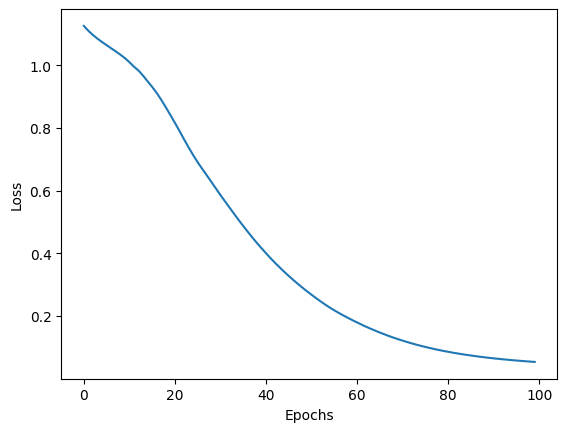

In [67]:
# Graph Epochs vs Losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')